In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json

class data_storage:
    b = np.array([]);
    l = np.array([]);
    t = np.array([]);
    v = np.array([]);
    d = np.array([]);
    g = np.array([]);
    s = np.array([]);
    c = np.array([]);

def extract_data( TXTpath ):
    X = data_storage()
    Cb = 0;
    Ct = 0;
    with open(TXTpath) as f:
        line = f.readline()
        while line:
            line = f.readline()
            if( line[0:2] == ".b" ):
                Cb+=1;
                X.b = np.append(X.b, int(line[2:]))
            if( line[0:2] == ".g" ):
                X.g = np.append(X.g, int(line[3:]))        
            if( line[0:2] == ".s" ):
                X.s = np.append(X.s, int(line[3:]))
            if( line[0:2] == ".c" ):
                X.c = np.append(X.c, float(line[3:]))
            if( line[0:2] == ".d" ):
                X.d = np.append(X.d, int(line[3:]))
            if( line[0:2] == ".l" ):
                X.l = np.append(X.l,float(line[3:]))
            if( line[0:2] == ".t" ):
                Ct+=1;
                X.t = np.append(X.t,float(line[3:]))
                if( Cb != Ct ):
                    print(X.b[Cb-1])
            if( line[0:2] == ".v" ):
                X.v = np.append(X.v,float(line[3:]))
            
    return X
    


SD = extract_data( 'SD/RES/summary.txt' )
ISD = extract_data( 'ISD/RES/summary.txt' )
IDSD = extract_data( 'IDSD/RES/summary.txt' )
#tIDSD = extract_data( 'tIDSD/RES/summary.txt' )
dcIDSD = extract_data( 'dcIDSD/RES/summary.txt' )


f = open ('../SD.json', "r")
SDjson = json.loads(f.read())

f = open ('../ISD.json', "r")
ISDjson = json.loads(f.read())

f = open ('../IDSD.json', "r")
IDSDjson = json.loads(f.read())

#f = open ('../tIDSD.json', "r")
#tIDSDjson = json.loads(f.read())

f = open ('../dcIDSD.json', "r")
dcIDSDjson = json.loads(f.read())


runtimeSD = [SDjson[0]["entries"][j]["runtime"] for j in range(0,99,1)]
runtimeISD = [ISDjson[0]["entries"][j]["runtime"] for j in range(0,99,1)]
runtimeIDSD = [IDSDjson[0]["entries"][j]["runtime"] for j in range(0,99,1)]
runtimedcIDSD = [dcIDSDjson[0]["entries"][j]["runtime"] for j in range(0,99,1)]
#runtimetIDSD = [tIDSDjson[0]["entries"][j]["runtime"] for j in range(0,99,1)]


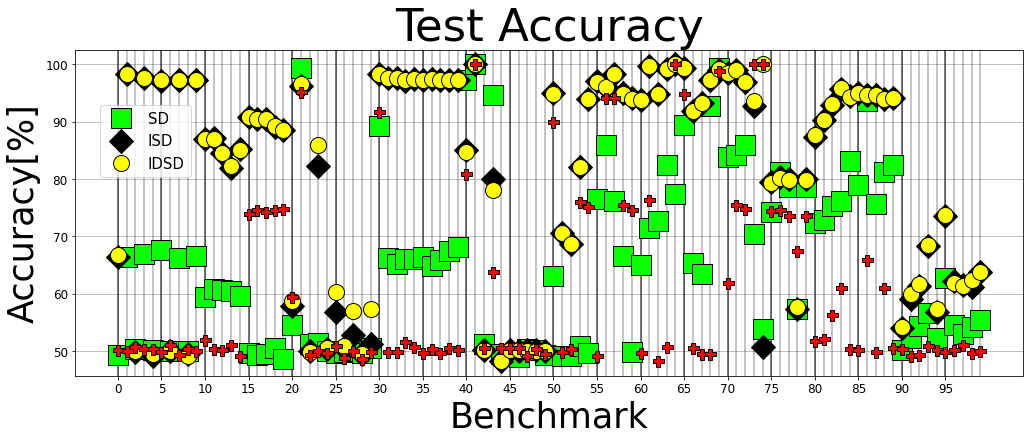

In [2]:
#import matplotlib.font_manager

fig = plt.figure(figsize=(17,6))
ax = plt.gca()
plt.xticks(range(0,100,5), fontsize=30)
for b in range(0,100,1):
    plt.axvline(x=b, color='k', alpha = 0.3)
for b in range(0,100,5):
    plt.axvline(x=b, color='k', alpha = 0.5)
plt.grid()
lineSD, = ax.plot(SD.b, SD.t , 's', c='#0aff02', alpha=1, markeredgecolor='k', markersize = 20, label = 'SD')
lineISD, = ax.plot(ISD.b, ISD.t , 'D', c='k', alpha=1, markeredgecolor='k', markersize = 17 , label = 'ISD')
lineIDSD, = ax.plot(IDSD.b, IDSD.t, 'o', c='yellow', alpha=1, markeredgecolor='k', markersize = 16, label = 'IDSD')
linedcIDSD, = ax.plot(dcIDSD.b, dcIDSD.t, 'P', c='red', alpha=1, markeredgecolor='k', markersize = 11, label = 'dcDSD')

ax.legend( handles = [lineSD, lineISD, lineIDSD], fontsize=15, bbox_to_anchor=(0.09, 0.75, 0.04, .102)) #,

plt.rcParams["font.family"] = "sans"
plt.xlabel('Benchmark', fontsize=35)
plt.ylabel('Accuracy[%]', fontsize=35)
plt.title('Test Accuracy', fontsize=45)
ax.tick_params(axis='both', which='major', labelsize=12)
plt.savefig('acc.png')

In [3]:
from tabulate import tabulate
def extract_row_data( X, runtime, label ):
    return [label, np.mean(X.l),np.mean(X.t), np.mean(X.g), np.mean(X.d), np.mean(X.v-X.t), np.mean(runtime)]

rowSD = extract_row_data( SD, runtimeSD, "SD")
rowISD = extract_row_data( ISD, runtimeISD,"ISD" )
rowIDSD = extract_row_data( IDSD, runtimeIDSD, "IDSD" )
rowdcIDSD = extract_row_data( dcIDSD, runtimedcIDSD,"dcIDSD" )
#row5 = extract_row_data( dcIDSD, runtimedcIDSD, "dcIDSD" )

#row2 = ["I-DSD",np.mean(t2), np.mean(g2), np.mean(s2), np.mean(d2), np.mean(np.abs(t2-v2))];
table = [ rowSD, rowISD, rowIDSD, rowdcIDSD ] #row2
print(tabulate(table, headers = ["method","train accuracy","test accuracy","And gates","levels","overfit","time"], tablefmt="github"))

| method   |   train accuracy |   test accuracy |   And gates |   levels |   overfit |     time |
|----------|------------------|-----------------|-------------|----------|-----------|----------|
| SD       |          99.9966 |         64.9619 |     6189.64 |   140.61 |  0.144843 |  6.54338 |
| ISD      |          99.9966 |         80.4341 |     1162.23 |    72.54 |  0.17734  |  3.36488 |
| IDSD     |          99.9953 |         81.1436 |      958.19 |    68.58 |  0.111403 | 73.0732  |
| dcIDSD   |          99.9966 |         60.392  |     6405.97 |   316.39 |  0.015776 | 84.0452  |


In [4]:
print(100*np.mean((IDSD.t-ISD.t)/ISD.t))
print(100*np.mean((IDSD.g-ISD.g)/ISD.g))
print(100*np.mean((IDSD.d-ISD.d)/ISD.d))

1.3438866176528004
-15.812441610942141
-9.662106635523488


In [30]:
print(100*np.mean((IDSD0.t-tIDSD.t)/ISD.t))
print(100*np.mean((IDSD0.g-tIDSD.g)/ISD.g))
print(100*np.mean((IDSD0.d-tIDSD.d)/ISD.d))

0.3131149604098472
-0.5850315766193184
-0.08893280632411067


In [26]:
print(100*np.mean((IDSD1.t-ISD.t)/ISD.t))
print(100*np.mean((IDSD1.g-ISD.g)/ISD.g))
print(100*np.mean((IDSD1.d-ISD.d)/ISD.d))

1.333863531620916
-15.897275255645434
-9.693638513014248


In [27]:
print(100*np.mean((IDSD2.t-ISD.t)/ISD.t))
print(100*np.mean((IDSD2.g-ISD.g)/ISD.g))
print(100*np.mean((IDSD2.d-ISD.d)/ISD.d))

1.3421813994168288
-15.872175750603024
-9.672569330624311


In [29]:
print(100*np.mean((IDSD2.t-tIDSD.t)/ISD.t))
print(100*np.mean((IDSD2.g-tIDSD.g)/ISD.g))
print(100*np.mean((IDSD2.d-tIDSD.d)/ISD.d))

0.38028995204976945
0.020296821006742467
-0.26754408929965434


In [13]:
print((np.mean(IDSD.t)-np.mean(ISD.t))/(np.mean(ISD.t)))
print((np.mean(IDSD.g)-np.mean(ISD.g))/(np.mean(ISD.g)))
print((np.mean(IDSD.d)-np.mean(ISD.d))/(np.mean(ISD.d)))

0.007426492927505222
-0.18171102105435244
-0.049352081610146294


In [14]:
print(np.mean((IDSD.t-ISD.t)/ISD.t))
print(np.mean((IDSD.g-ISD.g)/ISD.g))
print(np.mean((IDSD.d-ISD.d)/ISD.d))

0.011333876558442212
-0.16466196304262565
-0.09437283305840785


In [15]:
print(np.mean((aIDSD.t-ISD.t)/ISD.t))
print(np.mean((aIDSD.g-ISD.g)/ISD.g))
print(np.mean((aIDSD.d-ISD.d)/ISD.d))

0.011679538719877584
-0.09567329438572314
-0.08211723366850812


In [20]:
print(np.mean((IDSDadv.t-ISD.t)/ISD.t))
print(np.mean((IDSDadv.g-ISD.g)/ISD.g))
print(np.mean((IDSDadv.d-ISD.d)/ISD.d))

0.012750064077769067
-0.16477504148229083
-0.09493958047648766


In [58]:
IDSD.g

array([1767.,  164., 1974.,  143., 1742.,  136., 1491.,  138., 1354.,
        139.,  761.,  636.,  617.,  574.,  460.,  519.,  444.,  393.,
        369.,  350., 4760.,  571., 2430.,  878., 2009., 1678., 1751.,
       1504., 1527., 1357.,  156.,  160.,  157.,  149.,  149.,  145.,
        139.,  152.,  142.,  138., 1737.,  130., 2430., 1911., 2020.,
       2462., 1722., 2030., 1469., 1702.,  372., 1526., 1453.,  872.,
        302.,  171.,  158.,  122.,  220.,  227.,  428.,   44.,  320.,
         98.,    7.,  101.,  436.,  423.,  175.,  147.,  160.,  139.,
        224., 1215.,   45., 1936., 2030., 1985., 5165., 1985.,  646.,
        475.,  355.,  278.,  350.,  341.,  320.,  333.,  391.,  365.,
       2120., 1254., 2625., 2483., 2052.,  865., 1950., 2008., 1201.,
       1185.])